<a href="https://colab.research.google.com/github/TatyanaLanceva/Netology/blob/main/5_2_data_visualization_and_descriptive_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание:**

*   Проведите оценку данных по столбцам, посмотрите визуально на распределение
данных, определите базовые статистики, где это возможно.

*   Найдите выбросы в данных, для наглядности используйте соответствующие типы визуализаций. Попробуйте объяснить их появление в наборе.

*   Задайте 4-6 вопросов к вашим данным и постарайтесь ответить на них графически (один вопрос/гипотеза — один график).

*   Желательно, но не обязательно:*

Если данные содержат пропуски, заполните их и обоснуйте своё решение. Проверьте, как изменились базовые статистики до и после замены.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from collections import defaultdict

In [ ]:
salary = pd.read_csv('/content/salary_dataset.csv')
salary

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...,...
6699,6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


In [ ]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6704 non-null   int64  
 1   Age                  6702 non-null   float64
 2   Gender               6702 non-null   object 
 3   Education Level      6701 non-null   object 
 4   Job Title            6702 non-null   object 
 5   Years of Experience  6701 non-null   float64
 6   Salary               6699 non-null   float64
 7   Country              6704 non-null   object 
 8   Race                 6704 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 471.5+ KB


Анализируя информацию по датасету мы видим, что столбец с порядковым номером задвоен, один можно удалить. Также мы видим пропуски в разных столбцах.

In [ ]:
salary = salary.drop('Unnamed: 0', axis=1) # удалим лишний столбец

In [ ]:
salary.describe() # выведем описательные статистики по возрасту, стажу и доходу, это строки с типом float 64, заполним в одной табличке

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


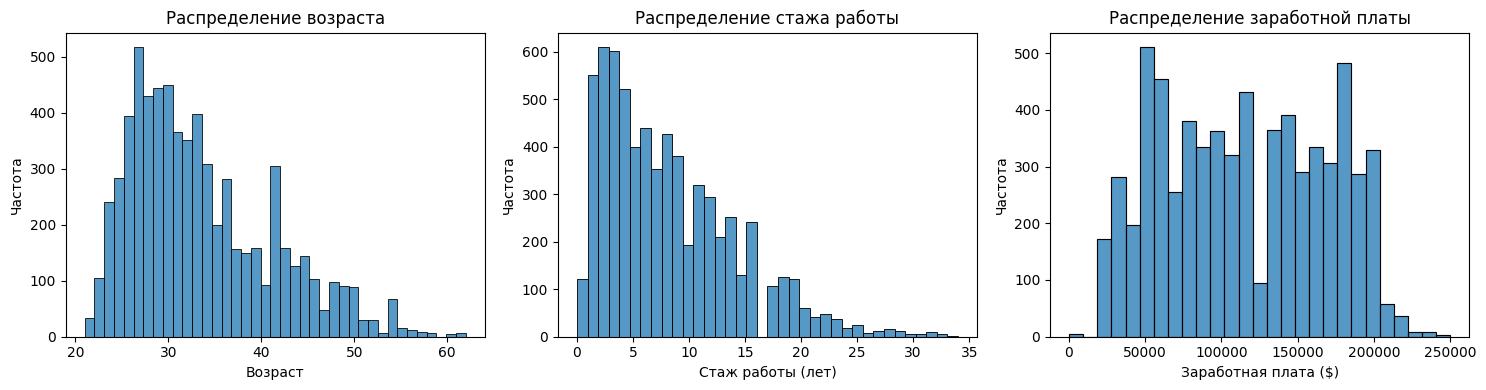

In [ ]:
# Построим три гистограммы по столбцам: возраст, стаж и доход с целью посмотреть распределение.
# Изучим вопросы, как распределены эти данные

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(salary['Age'], ax=axes[0])
sns.histplot(salary['Years of Experience'], ax=axes[1])
sns.histplot(salary['Salary'], ax=axes[2])

# Подпишем оси и заголовки:
axes[0].set_title('Распределение возраста')
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Частота')

axes[1].set_title('Распределение стажа работы')
axes[1].set_xlabel('Стаж работы (лет)')
axes[1].set_ylabel('Частота')

axes[2].set_title('Распределение заработной платы')
axes[2].set_xlabel('Заработная плата ($)')
axes[2].set_ylabel('Частота')

plt.tight_layout()
plt.show()

Проанализируем гистограммы по трем колонкам: возраст, стаж и доход. Распределения по возрасту и стажу правосторонние. Пики смещены влево. Это указывает нам на то, что в выборке преобладают молодые люди возрастом до 35 лет (пик 26 лет) с опытом работы до 10 лет (пик 2 года). Также есть другие значения, но преобладают вышеуказанные. По доходу распределение имеет два пика - 50 000 и 200 000. Бимодальность указывает на существование двух основных категорий сотрудников с разными уровнями доходов.Если причины бимодальности связаны с разными категориями сотрудников, возможно, стоит разделить данные и анализировать каждую группу отдельно.
По выбросам мы видим в распределении возраста маленький столбец после 50 лет. В распределении стажа отсутствует столбец после 16 лет стажа, далее снижение идет равномерно. По распределению заработной платы мы видим снижение в виде столбца значительно ниже ближайших в диапазоне около 130 000.
Это предварительные выводы без дополнительной работы с датафреймом.

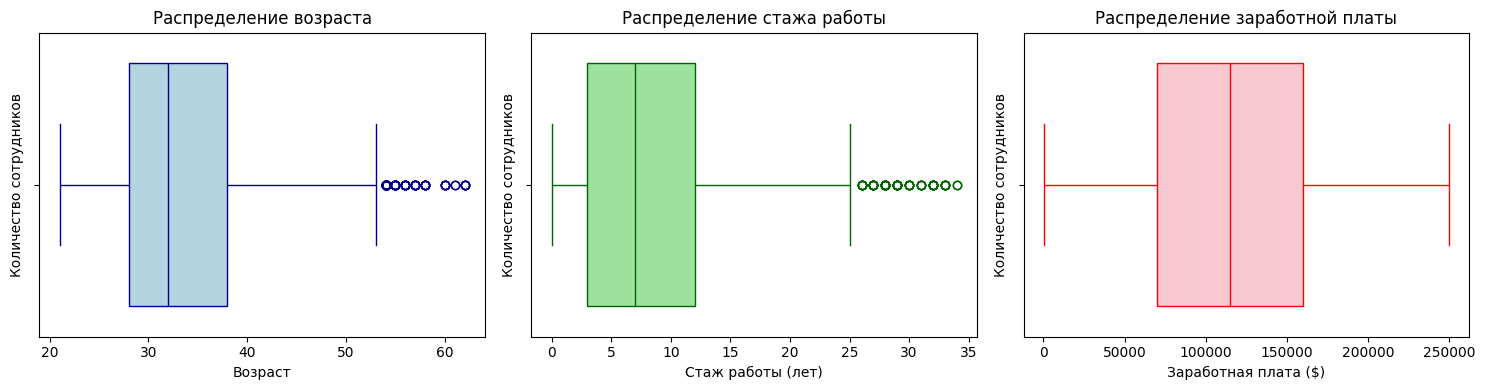

In [ ]:
# Построим три диаграммы "ящик с усами", изучим вопросы, есть ли у нас выбросы по этим категориям, для их нахождения используем графики
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Распределение возраста
sns.boxplot(x=salary['Age'], ax=axes[0], color='lightblue', linecolor='darkblue')
axes[0].set_title('Распределение возраста')
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Количество сотрудников')

# Распределение стажа
sns.boxplot(x=salary['Years of Experience'], ax=axes[1], color='lightgreen', linecolor='darkgreen')
axes[1].set_title('Распределение стажа работы')
axes[1].set_xlabel('Стаж работы (лет)')
axes[1].set_ylabel('Количество сотрудников')

# Распределение заработной платы
sns.boxplot(x=salary['Salary'], ax=axes[2], color='pink', linecolor='red')
axes[2].set_title('Распределение заработной платы')
axes[2].set_xlabel('Заработная плата ($)')
axes[2].set_ylabel('Количество сотрудников')

plt.tight_layout()
plt.show()

Построим три диаграммы типа ящик с усами для столбцов возраст, стаж работы и заработная плата. Здесь мы видим значительное количество выбросов по столбцам возраст и стаж. По ассимитричности мы также видим, что медиана в возрасте и стаже расположена в верхней части коробки, что указывает на ассиметрию. Медиана, расположенна посередине графика в заработной плате указывает на более равномерное распределение данных.

In [ ]:
# Для каждого столбца DataFrame salary вычисляем процент пропущенных значений,
# округляя результат до двух знаков после запятой

(salary.isna().mean() * 100).round(2)


,0
Age,0.03
Gender,0.03
Education Level,0.04
Job Title,0.03
Years of Experience,0.04
Salary,0.07
Country,0.00
Race,0.00


In [ ]:
# Процент пропущенных значений не велик, менее 1 процента.
# Удалим строки с пропущенными данными и выведем информацию
salary.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
 6   Country              6698 non-null   object 
 7   Race                 6698 non-null   object 
dtypes: float64(3), object(5)
memory usage: 471.0+ KB


In [ ]:
salary.dropna().describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


Проанализируем, что нам дало удаление пропусков:
Количество наблюдений до удаления пропусков: Возраст (Age): 6702, Опыт работы (Years of Experience): 6701, Зарплата (Salary): 6699. После удаления пропусков все переменные имеют одинаковое количество наблюдений: 6698.
Были удалены все строки с пропущенными значениями во всех трёх столбцах.
По средним значениям. Возраст изменился незначительно (с 33.621 до 33.623), опыт работы: увеличился немного (с 8.095 до 8.096), зарплата: увеличилась очень незначительно (с 115327 до 115329).
Эти небольшие изменения говорят о том, что удаление пропусков не оказало существенного влияния на средние значения.
По стандартным отклонениям возраст увеличился незначительно (с 7.615 до 7.616),
опыт работы увеличился незначительно (с 6.059 до 6.060), зарплата увеличилась незначительно (с 52786 до 52790).
Незначительное увеличение стандартных отклонений может указывать на небольшое увеличение разброса данных после удаления пропусков.
Значения минимальных и максимальных показателей для возраста, опыта работы и зарплаты остались неизменными. Это говорит о том, что крайние значения данных не были затронуты удалением пропусков.
Все квартили (25%, 50%, 75%) остались абсолютно идентичными до и после удаления пропусков. Это подтверждает стабильность распределения данных даже после очистки от пропусков.
Можно сделать вывод, что удаление пропусков привело к незначительным изменениям в средних значениях и стандартном отклонении, но общее распределение данных осталось практически тем же самым. Крайние значения и основные характеристики (квартиля) сохранились. Это указывает на то, что данные были достаточно однородны изначально, и удаление пропусков не сильно сказалось на их структуре.

In [ ]:
# Приведем значения возраст и стаж к формату int, а не float
# Округление средних значений до целых чисел
age_mean = round(salary['Age'].mean())
years_exp_mean = round(salary['Years of Experience'].mean())
# Заполнение пропущенных значений и приведение типов
salary['Age'] = salary['Age'].fillna(age_mean).astype(np.int64)
salary['Years of Experience'] = salary['Years of Experience'].fillna(years_exp_mean).astype(np.int64)

print(salary.dtypes)  # Проверка типов данных

Age                      int64
Gender                  object
Education Level         object
Job Title               object
Years of Experience      int64
Salary                 float64
Country                 object
Race                    object
dtype: object


In [ ]:
# Просмотрим категориальные данные. Мода и уникальные значения по столбцу пол.
# Чаще всего встречаются мужчины.

print('Мода по полу:', salary['Gender'].mode()[0])
print('-' * 25)
category_distribution_gender = salary['Gender'].value_counts() # Посчитаем значения по категориям 1 - есть вмешательство и 2 - не было вмешательства
category_distribution_gender

Мода по полу: Male
-------------------------


,count
Gender,
Male,3674
Female,3014
Other,14


In [ ]:
# Просмотрим категориальные данные. Мода и уникальные значения по столбцу образование.

print('Мода по уровню образования:', salary['Education Level'].mode()[0])
print('-' * 45)
category_distribution_education = salary['Education Level'].value_counts() # Посчитаем значения по категориям
category_distribution_education

Мода по уровню образования: Bachelor's Degree
---------------------------------------------


,count
Education Level,
Bachelor's Degree,2267
Master's Degree,1573
PhD,1368
Bachelor's,756
High School,448
Master's,288
phD,1


Здесь мы видим, что у нас есть значения с одинаковыми названиями, но указаными по-разному, из-за разных регистров или написания. Это приводит к задвоению значений. Целесообразно привести их к единому написанию.

In [ ]:
# Словарь для замены значений
mapping = {
    "Bachelor's": "Bachelor's Degree",
    "Master's": "Master's Degree",
    "phD": "PhD"
}

# Замена значений в столбце Education Level
salary['Education Level'] = salary['Education Level'].replace(mapping)

# Выводим и проверим результаты, видим, что значения очистились от дубликатов
salary['Education Level'].value_counts()

,count
Education Level,
Bachelor's Degree,3023
Master's Degree,1861
PhD,1369
High School,448


In [ ]:
# Просмотрим категориальные данные. Мода и уникальные значения по столбцу работа.

print('Мода по наименованию работы:', salary['Job Title'].mode()[0])
print('-' * 45)
category_distribution_job = salary['Job Title'].value_counts() # Посчитаем значения по категориям
category_distribution_job

Мода по наименованию работы: Software Engineer
---------------------------------------------


,count
Job Title,
Software Engineer,518
Data Scientist,453
Software Engineer Manager,376
Data Analyst,363
Senior Project Engineer,318
...,...
Account Manager,1
Help Desk Analyst,1
Senior Training Specialist,1


In [ ]:
# Приводим строки к нижнему регистру и удаляем лишние пробелы
salary['Job Title'] = salary['Job Title'].str.lower().str.strip()

# Словарь синонимов, попробуем сократить количество значений за счет того, что уберем сокращения и ошибку
synonyms = {
    'rep': 'representative',
    'hr': 'human resources',
    'juniour': 'junior'
}

# Функция для замены синонимов
def replace_synonyms(title):
    if isinstance(title, str):  # Проверяем, является ли значение строкой
        for key, value in synonyms.items():
            title = title.replace(key, value)
        return title
    else:
        return title

# Применяем функцию замены синонимов ко всем значениям в столбце 'Job Title'
salary['Job Title'] = salary['Job Title'].apply(replace_synonyms)

# Подсчитываем количество уникальных значений и их частоты
job_title_counts = salary['Job Title'].value_counts()

print("\nВсе уникальные наименования в столбце 'Job Title':")
for title in job_title_counts.index:
    print(title)
unique_job_titles_count = salary['Job Title'].nunique()

print("Количество уникальных наименований должностей:", unique_job_titles_count)


Все уникальные наименования в столбце 'Job Title':
software engineer
data scientist
software engineer manager
data analyst
senior project engineer
product manager
full stack engineer
front end developer
marketing manager
back end developer
senior software engineer
marketing coordinator
junior sales associate
financial manager
marketing analyst
software developer
operations manager
human resources manager
director of marketing
web developer
product designer
research director
content marketing manager
director of human resources
sales associate
research scientist
senior product marketing manager
marketing director
sales director
junior human resources generalist
senior data scientist
junior software developer
receptionist
director of data science
sales manager
digital marketing manager
junior software engineer
senior human resources manager
junior marketing manager
senior research scientist
human resources coordinator
junior web developer
senior human resources generalist
junior sales r

Можно сделать вывод, что несмотря на то, что мы провели замену синонимов и попытались сократить количество значений в этой категории, их все равно остается слишком много для ручной группировки по направлениям. Если бы этих значений было бы меньше, можно было бы разделить их по группам, добавить эту информацию в отдельный столбец и использовать для графиков.

In [ ]:
# Просмотрим категориальные данные по столбцу страна. Мода и уникальные значения по столбцу страна.
# Чаще всего встречаетя США.

print('Мода по полу:', salary['Country'].mode()[0])
print('-' * 25)
category_distribution_gender = salary['Country'].value_counts() # Посчитаем значения по категориям
category_distribution_gender

Мода по полу: USA
-------------------------


,count
Country,
USA,1360
China,1343
UK,1337
Australia,1336
Canada,1328


In [ ]:
# Просмотрим категориальные данные по столбцу раса. Мода и уникальные значения по столбцу страна.

print('Мода по полу:', salary['Race'].mode()[0])
print('-' * 25)
category_distribution_gender = salary['Race'].value_counts() # Посчитаем значения по категориям
category_distribution_gender

Мода по полу: White
-------------------------


,count
Race,
White,1968
Asian,1603
Korean,457
Australian,452
Chinese,444
Black,437
African American,354
Mixed,334
Welsh,333


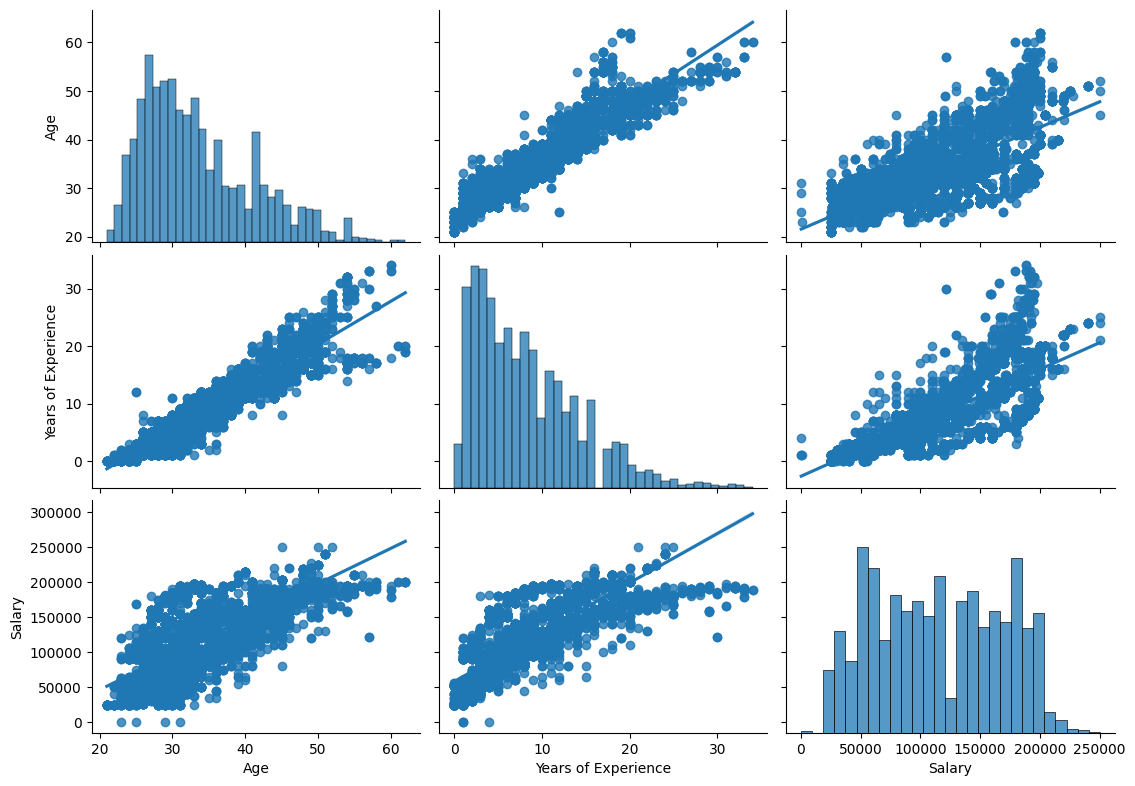

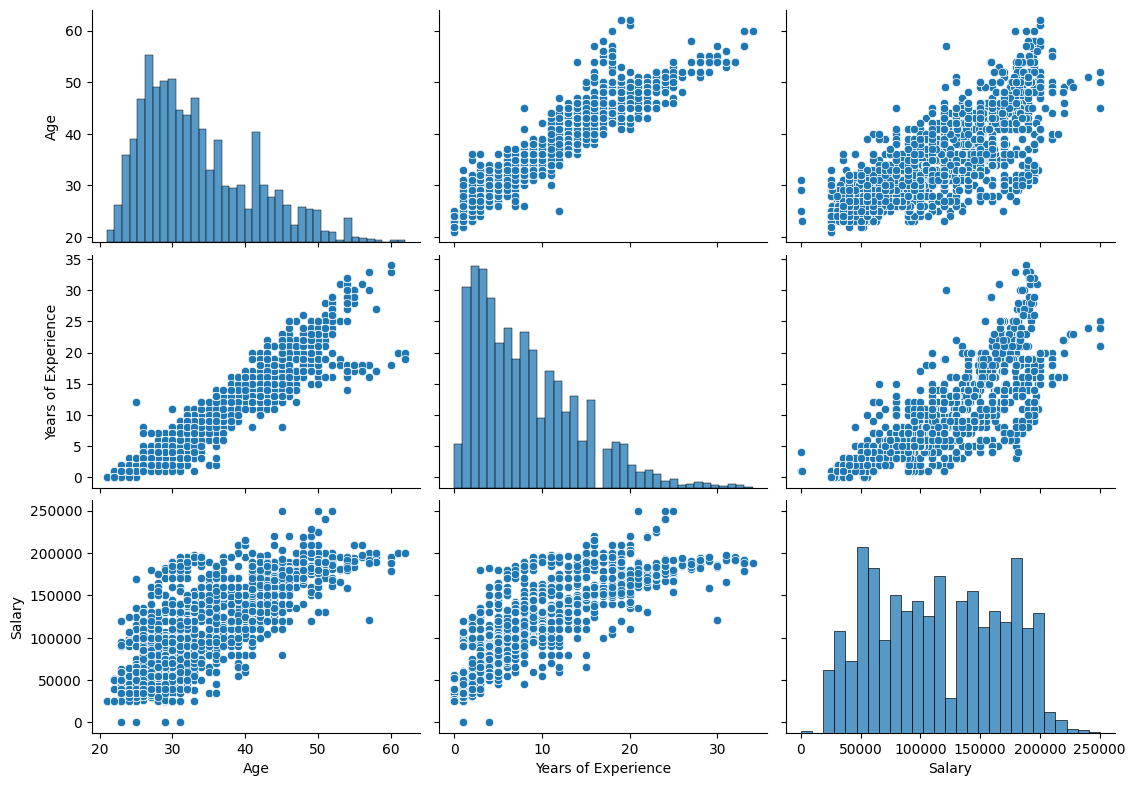

In [ ]:
# Для дополнительного анализа визуализируем взаимосвязь между различными переменными датасета и ответим на вопросы, есть ли корреляция между какими-то параметрами.
# Создаем pairplot с регрессией
g = sns.pairplot(salary, kind="reg")
g.fig.set_size_inches(12, 8)  # Устанавливаем размеры фигуры
plt.show()

# Создаем pairplot без регрессии
h = sns.pairplot(salary, kind="scatter")
h.fig.set_size_inches(12, 8)  # Устанавливаем размеры фигуры
plt.show()

Гистограммы мы рассматривали в начале. Посмотрим, что показывают другие графики. Мы видим положительную корреляцию между возрастом и стажем, есть выбросы во второй четверти графика и более разреженные значения в конце графика, но линейная корреляция есть. Есть положительная корреляция и на графике, показывающем связь между стажем и доходом. Причем график на конце будто раздваивается, как и два пика на гистограмме распределения дохода.

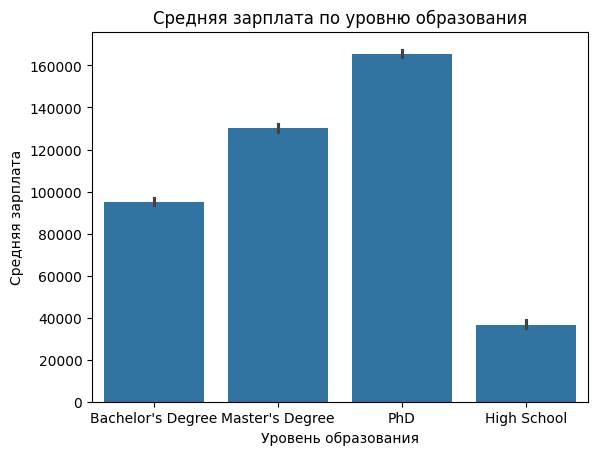

In [ ]:
# Ответим на вопрос, растет ли заработная плата при получении более высокого уровня образования.

sns.barplot(x='Education Level', y='Salary', data=salary)
plt.title('Средняя зарплата по уровню образования')
plt.xlabel('Уровень образования')
plt.ylabel('Средняя зарплата')
plt.show()

Мы видим, что средняя заработная плата растет с повышением уровня образования. Это ожидаемая взаимосвязь.

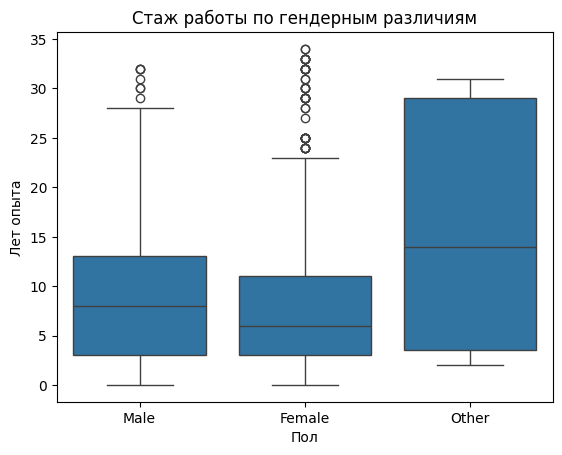

In [ ]:
# Ответим на вопрос, есть ли разница по стажу работы у разных полов, просотрим графики.

sns.boxplot(x='Gender', y='Years of Experience', data=salary)
plt.title('Стаж работы по гендерным различиям')
plt.xlabel('Пол')
plt.ylabel('Лет опыта')
plt.show()

Данный график показывает нам, что у мужчин выше верхняя граница ящика и выше медиана по опыту. У женщин больше выбросов, ниже медиана. У остальных полов верхняя граница опыта значительно выше, как и медиана, выбросов нет. Границы ящика сближены со значениями усов.Сложно сделать выводы по остальным полам. Но распределение между мужчинами и женщинами показывает, что значения по опыту у мужчин повыше.

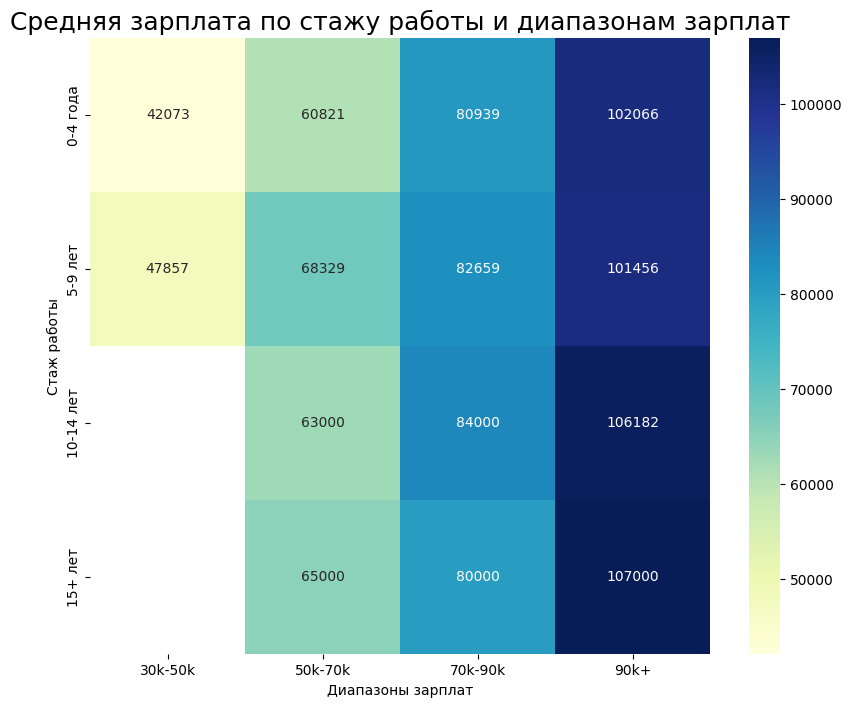

In [ ]:
# Для анализа зарплат и стажа построим тепловую карту. Ответим на вопрос, есть ли рост заработной платы с увеличением стажа.
# Группировка данных по годам опыта и зарплате
bins_experience = [0, 4, 9, 14, 24]
labels_experience = ["0-4 года", "5-9 лет", "10-14 лет", "15+ лет"]
bins_salary = [30000, 50000, 70000, 90000, 110000]
labels_salary = ["30k-50k", "50k-70k", "70k-90k", "90k+"]

salary["ExperienceGroup"] = pd.cut(salary["Years of Experience"], bins=bins_experience, labels=labels_experience)
salary["SalaryGroup"] = pd.cut(salary["Salary"], bins=bins_salary, labels=labels_salary)

# Создание сводной таблицы
pivot_table = salary.pivot_table(index="ExperienceGroup", columns="SalaryGroup", values="Salary", aggfunc="mean", observed=True)

# Построение тепловой карты
plt.figure(figsize=(10, 8))
cmap = "YlGnBu"
annot = True
fmt = ".0f"

sns.heatmap(pivot_table, cmap=cmap, annot=annot, fmt=fmt)
plt.title("Средняя зарплата по стажу работы и диапазонам зарплат", fontsize=18)
plt.xlabel("Диапазоны зарплат")
plt.ylabel("Стаж работы")
plt.show()

Тепловая карта, созданная на основе столбцов Years of Experience и Salary, предоставляет информацию о средних значениях зарплат для различных комбинаций стажа работы и диапазонов зарплат. Она позволяет увидеть закономерности и тенденции в распределении зарплат в зависимости от опыта сотрудников. По мере увеличения стажа работы сотрудники обычно получают более высокую зарплату. Это отражается в увеличении значений в ячейках тепловой карты по мере перехода от меньшего опыта к большему. Группы со стажем 10+ лет не имеют значений в низких уровнях дохода, эти ячейки не заполнены. На основании тепловой карты можно делать прогнозы относительно ожидаемой заработной платы для новых сотрудников с определенным уровнем опыта. В нашей ситуации мы видим рост дохода по мере увеличения опыта в группе дохода 90+ тысяч. Но в диапазонах 70-90 тысяч мы видим, что стаж 15+ лет не дает преимуществ по доходу, по сравнению со стажем 10-14 лет. Такая же ситуация по доходу 50-70 тысяч и стажу 10+ лет, нет преимуществ. Доход выше наблюдается в стаже 5-9 лет.